#ANALISA HASIL SOAL 2 DAN 3

Versi pandas: 2.2.2
Versi numpy: 2.0.2
Mounting Google Drive...
Mounted at /content/drive

Perbandingan Metrik Model:
+----+-------------------------------+------------+-------------+----------+------------+
|    | Model                         |   Accuracy |   Precision |   Recall |   F1-Score |
+====+===============================+============+=============+==========+============+
|  0 | MultBERT (Non-Augmented)      |     0.8500 |      0.8678 |   0.8500 |     0.8197 |
+----+-------------------------------+------------+-------------+----------+------------+
|  1 | MultiBERT (Augmented)         |     0.9367 |      0.9370 |   0.9367 |     0.9368 |
+----+-------------------------------+------------+-------------+----------+------------+
|  2 | LSTM FastText (Non-Augmented) |     0.8533 |      0.8623 |   0.8533 |     0.8376 |
+----+-------------------------------+------------+-------------+----------+------------+
|  3 | LSTM FastText (Augmented)     |     0.7700 |      0.6066 |   0.77

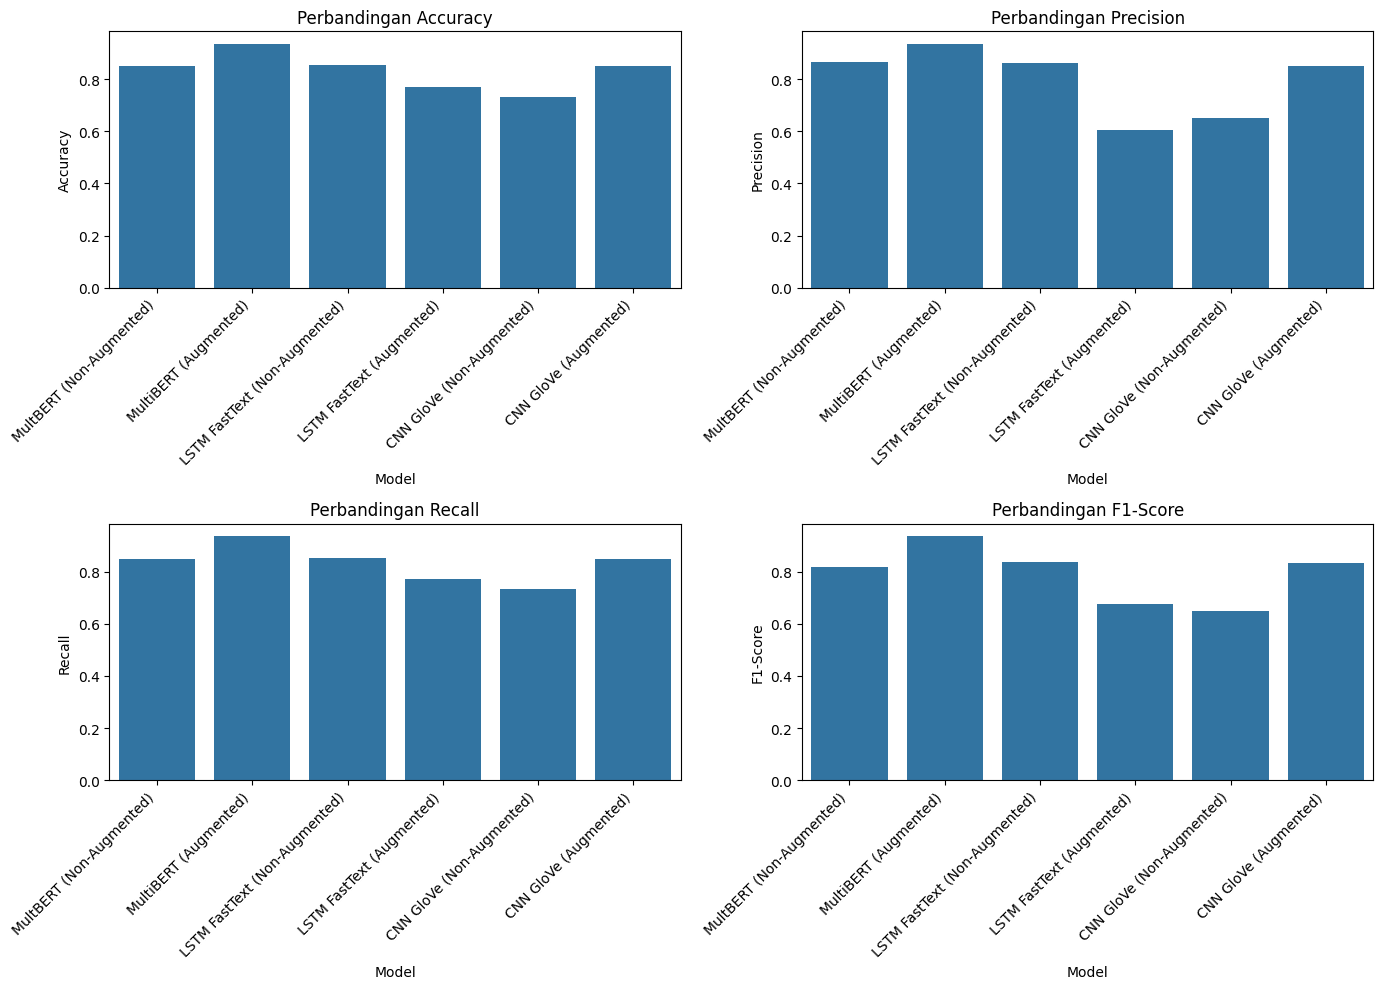


Analisis Confusion Matrix:

MultBERT (Non-Augmented):
+---------+-----------+----------+-----------+
|         |   Negatif |   Netral |   Positif |
+=========+===========+==========+===========+
| Negatif |        21 |        0 |        44 |
+---------+-----------+----------+-----------+
| Netral  |         0 |       19 |         0 |
+---------+-----------+----------+-----------+
| Positif |         1 |        0 |       215 |
+---------+-----------+----------+-----------+


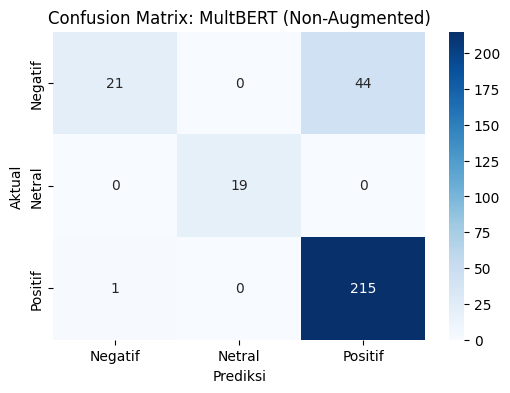


MultiBERT (Augmented):
+---------+-----------+----------+-----------+
|         |   Negatif |   Netral |   Positif |
+=========+===========+==========+===========+
| Negatif |        56 |        0 |         9 |
+---------+-----------+----------+-----------+
| Netral  |         0 |       19 |         0 |
+---------+-----------+----------+-----------+
| Positif |        10 |        0 |       206 |
+---------+-----------+----------+-----------+


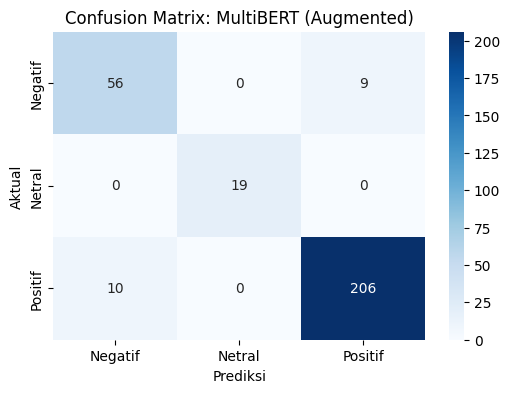


LSTM FastText (Non-Augmented):
+---------+-----------+----------+-----------+
|         |   Negatif |   Netral |   Positif |
+=========+===========+==========+===========+
| Negatif |        32 |        1 |        32 |
+---------+-----------+----------+-----------+
| Netral  |         0 |       11 |         8 |
+---------+-----------+----------+-----------+
| Positif |         3 |        0 |       213 |
+---------+-----------+----------+-----------+


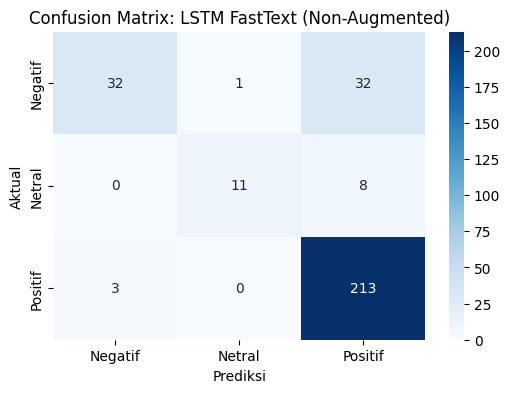


LSTM FastText (Augmented):
+---------+-----------+----------+-----------+
|         |   Negatif |   Netral |   Positif |
+=========+===========+==========+===========+
| Negatif |         0 |        0 |        65 |
+---------+-----------+----------+-----------+
| Netral  |         0 |       16 |         3 |
+---------+-----------+----------+-----------+
| Positif |         0 |        1 |       215 |
+---------+-----------+----------+-----------+


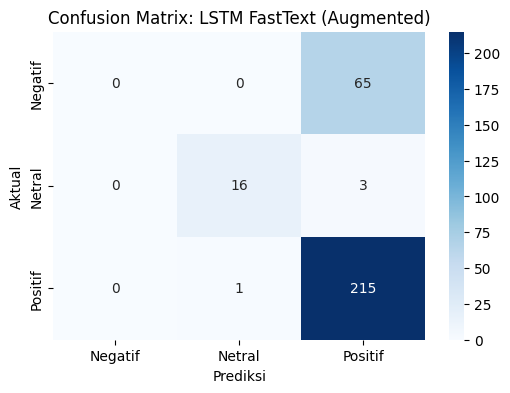


CNN GloVe (Non-Augmented):
+---------+-----------+----------+-----------+
|         |   Negatif |   Netral |   Positif |
+=========+===========+==========+===========+
| Negatif |         7 |        0 |        58 |
+---------+-----------+----------+-----------+
| Netral  |         3 |        0 |        16 |
+---------+-----------+----------+-----------+
| Positif |         3 |        0 |       213 |
+---------+-----------+----------+-----------+


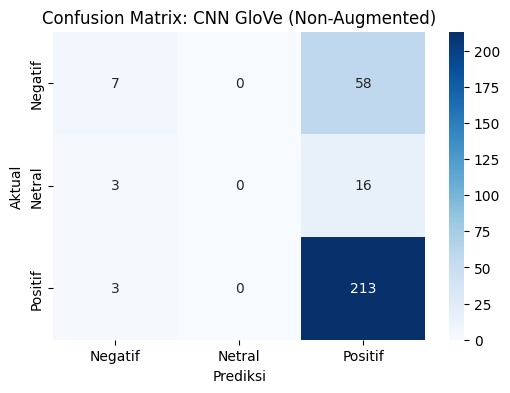


CNN GloVe (Augmented):
+---------+-----------+----------+-----------+
|         |   Negatif |   Netral |   Positif |
+=========+===========+==========+===========+
| Negatif |        35 |        4 |        26 |
+---------+-----------+----------+-----------+
| Netral  |         1 |        7 |        11 |
+---------+-----------+----------+-----------+
| Positif |         2 |        1 |       213 |
+---------+-----------+----------+-----------+


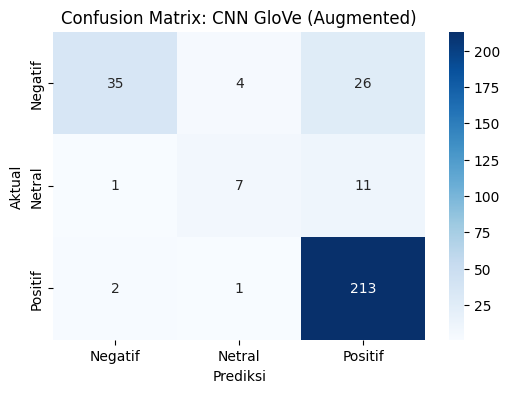


Analisis Performa Model:

MultBERT (Non-Augmented):
- Akurasi: 0.8500
- Presisi: 0.8678
- Recall: 0.8500
- F1-Score: 0.8197
- Performa per kelas (berdasarkan confusion matrix):
  - Negatif: 21/65 benar diprediksi (0.3231)
  - Netral: 19/19 benar diprediksi (1.0000)
  - Positif: 215/216 benar diprediksi (0.9954)

MultiBERT (Augmented):
- Akurasi: 0.9367
- Presisi: 0.9370
- Recall: 0.9367
- F1-Score: 0.9368
- Performa per kelas (berdasarkan confusion matrix):
  - Negatif: 56/65 benar diprediksi (0.8615)
  - Netral: 19/19 benar diprediksi (1.0000)
  - Positif: 206/216 benar diprediksi (0.9537)

LSTM FastText (Non-Augmented):
- Akurasi: 0.8533
- Presisi: 0.8623
- Recall: 0.8533
- F1-Score: 0.8376
- Performa per kelas (berdasarkan confusion matrix):
  - Negatif: 32/65 benar diprediksi (0.4923)
  - Netral: 11/19 benar diprediksi (0.5789)
  - Positif: 213/216 benar diprediksi (0.9861)

LSTM FastText (Augmented):
- Akurasi: 0.7700
- Presisi: 0.6066
- Recall: 0.7700
- F1-Score: 0.6767
- Perfor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Analisis disimpan di /content/drive/MyDrive/colab/model_results_analysis.txt


In [3]:
# Analyze_Model_Results.ipynb
import pandas as pd
import numpy as np
import json
from google.colab import drive
from google.colab import files
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Verifikasi versi library
print(f"Versi pandas: {pd.__version__}")
print(f"Versi numpy: {np.__version__}")

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)

# Path ke file JSON
base_path = '/content/drive/MyDrive/colab/'
result_files = [
    'multbert_results.json',
    'multbert_aug_results.json',
    'lstm_fasttext_results.json',
    'lstm_fasttext_aug_results.json',
    'cnn_glove_results.json',
    'cnn_glove_aug_results.json'
]

# Load dan kumpulkan data dari file JSON
metrics_data = []
for file in result_files:
    file_path = os.path.join(base_path, file)
    if not os.path.exists(file_path):
        print(f"File {file_path} tidak ditemukan. Lewati.")
        continue
    with open(file_path, 'r') as f:
        data = json.load(f)
        model_name = data['model']
        aug_status = 'Augmented' if 'aug' in file else 'Non-Augmented'
        metrics_data.append({
            'Model': f"{model_name} ({aug_status})",
            'Accuracy': data['accuracy'],
            'Precision': data['precision'],
            'Recall': data['recall'],
            'F1-Score': data['f1_score'],
            'Confusion Matrix': np.array(data['confusion_matrix'])
        })

# Buat DataFrame untuk metrik
metrics_df = pd.DataFrame(metrics_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Tampilkan tabel perbandingan metrik
print("\nPerbandingan Metrik Model:")
print(tabulate(metrics_df, headers='keys', tablefmt='grid', floatfmt='.4f'))

# Visualisasi metrik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.barplot(x='Model', y=metric, data=metrics_df, ax=ax)
    ax.set_xticks(range(len(metrics_df)))
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_title(f'Perbandingan {metric}')
plt.tight_layout()
plt.show()

# Analisis confusion matrix
print("\nAnalisis Confusion Matrix:")
for data in metrics_data:
    model = data['Model']
    cm = data['Confusion Matrix']
    print(f"\n{model}:")
    cm_df = pd.DataFrame(cm, index=['Negatif', 'Netral', 'Positif'], columns=['Negatif', 'Netral', 'Positif'])
    print(tabulate(cm_df, headers='keys', tablefmt='grid'))

    # Visualisasi confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.title(f'Confusion Matrix: {model}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# Analisis performa
print("\nAnalisis Performa Model:")
for data in metrics_data:
    model = data['Model']
    acc = data['Accuracy']
    prec = data['Precision']
    rec = data['Recall']
    f1 = data['F1-Score']
    cm = data['Confusion Matrix']
    print(f"\n{model}:")
    print(f"- Akurasi: {acc:.4f}")
    print(f"- Presisi: {prec:.4f}")
    print(f"- Recall: {rec:.4f}")
    print(f"- F1-Score: {f1:.4f}")
    print("- Performa per kelas (berdasarkan confusion matrix):")
    for i, label in enumerate(['Negatif', 'Netral', 'Positif']):
        true_pos = cm[i, i]
        total_actual = cm[i].sum()
        print(f"  - {label}: {true_pos}/{total_actual} benar diprediksi ({true_pos/total_actual:.4f})")

# Simpan hasil analisis
output_path = '/content/drive/MyDrive/colab/model_results_analysis.txt'
with open(output_path, 'w') as f:
    f.write("Perbandingan Metrik Model:\n")
    f.write(tabulate(metrics_df, headers='keys', tablefmt='plain', floatfmt='.4f') + "\n")
    f.write("\nAnalisis Performa Model:\n")
    for data in metrics_data:
        model = data['Model']
        acc = data['Accuracy']
        prec = data['Precision']
        rec = data['Recall']
        f1 = data['F1-Score']
        cm = data['Confusion Matrix']
        f.write(f"\n{model}:\n")
        f.write(f"- Akurasi: {acc:.4f}\n")
        f.write(f"- Presisi: {prec:.4f}\n")
        f.write(f"- Recall: {rec:.4f}\n")
        f.write(f"- F1-Score: {f1:.4f}\n")
        f.write("- Performa per kelas (berdasarkan confusion matrix):\n")
        for i, label in enumerate(['Negatif', 'Netral', 'Positif']):
            true_pos = cm[i, i]
            total_actual = cm[i].sum()
            f.write(f"  - {label}: {true_pos}/{total_actual} benar diprediksi ({true_pos/total_actual:.4f})\n")
files.download(output_path)

print(f"\nAnalisis disimpan di {output_path}")